Подключаю библиотеки скопировав начальный код из файла с заданием 

In [1]:
import pandas as pd
import numpy as np

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

# Настройка параметров визуализации
import warnings
warnings.filterwarnings("ignore")
plt.style.use('default')
sns.set_palette("husl")

# Настройки отображения для лучшего вывода
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

print("Все библиотеки успешно импортированы!")
print("Готовы начать практику визуализации данных!")

Все библиотеки успешно импортированы!
Готовы начать практику визуализации данных!


При чтении датасета пришлось скипать битые строки. Минус что из за этого некоторые данные были утеряны

In [2]:
db = pd.read_csv("./en.openfoodfacts.org.products.csv", sep="\t", low_memory=True, on_bad_lines="skip")
print("первые строки")
print(db.head())
print("форма")
print(db.shape)
print("инфа")
db.info()
print("пропущено")
print(db.isna().sum())

первые строки
  code                                                url                     creator   created_t      created_datetime  last_modified_t last_modified_datetime last_modified_by  last_updated_t last_updated_datetime  ... water-hardness_100g choline_100g phylloquinone_100g beta-glucan_100g inositol_100g carnitine_100g sulphate_100g nitrate_100g acidity_100g carbohydrates-total_100g
0    2  http://world-en.openfoodfacts.org/product/0000...                     kiliweb  1722606455  2024-08-02T13:47:35Z       1749171851   2025-06-06T01:04:11Z     altroconsumo    1.749172e+09  2025-06-06T01:04:11Z  ...                 NaN          NaN                NaN              NaN           NaN            NaN           NaN          NaN          NaN                      NaN
1    3  http://world-en.openfoodfacts.org/product/0000...  openfoodfacts-contributors  1752485388  2025-07-14T09:29:48Z       1752485389   2025-07-14T09:29:49Z              NaN    1.752485e+09  2025-07-14T09:29:49Z  ... 

Файл был прочитан успешно, правда за исключением битых строк

In [3]:
nutritional_columns = [
    'product_name', 'categories', 'countries',
    'energy_100g', 'proteins_100g', 'carbohydrates_100g', 
    'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'
]

db = db[nutritional_columns]

print("После выбора колонок:", db.shape)
db.head()


После выбора колонок: (4076334, 10)


,product_name,categories,countries,energy_100g,proteins_100g,carbohydrates_100g,fat_100g,sugars_100g,sodium_100g,nutriscore_grade
0,Filets de poulet blanc x2,Protein powders,"Brasilien, Germany",392.0,30.0,0.9,2.7,6.20,0.16,not-applicable
1,NaN,NaN,en:France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Entrecôesteack - Highland Beef,Nutrition drink mix,"Brasilien, Germany",2401.0,23.0,13.0,12.0,9.00,0.12,d
3,NaN,NaN,en:France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Triple cheese puff,"Boissons et préparations de boissons, Boissons...","Germany, United States, en:france",1520.0,22.0,25.0,11.0,0.98,0.38,c


In [4]:
db = db.dropna(subset=[
    'energy_100g', 'proteins_100g', 'carbohydrates_100g',
    'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'
])

print("После удаления пропусков:", db.shape)

db = db[
    (db['energy_100g'] >= 0) & (db['energy_100g'] <= 1000) &
    (db['proteins_100g'] >= 0) & (db['proteins_100g'] <= 100) &
    (db['carbohydrates_100g'] >= 0) & (db['carbohydrates_100g'] <= 100) &
    (db['fat_100g'] >= 0) & (db['fat_100g'] <= 100) &
    (db['sugars_100g'] >= 0) & (db['sugars_100g'] <= 100) &
    (db['sodium_100g'] >= 0) & (db['sodium_100g'] <= 100)
]

print("После фильтрации выбросов:", db.shape)

print("Распределение Nutri-Score:")
print(db['nutriscore_grade'].value_counts())


После удаления пропусков: (2470592, 10)
После фильтрации выбросов: (1139051, 10)
Распределение Nutri-Score:
nutriscore_grade
unknown           537677
c                 186012
a                 121639
d                 109311
b                 104291
e                  63280
not-applicable     16841
Name: count, dtype: int64


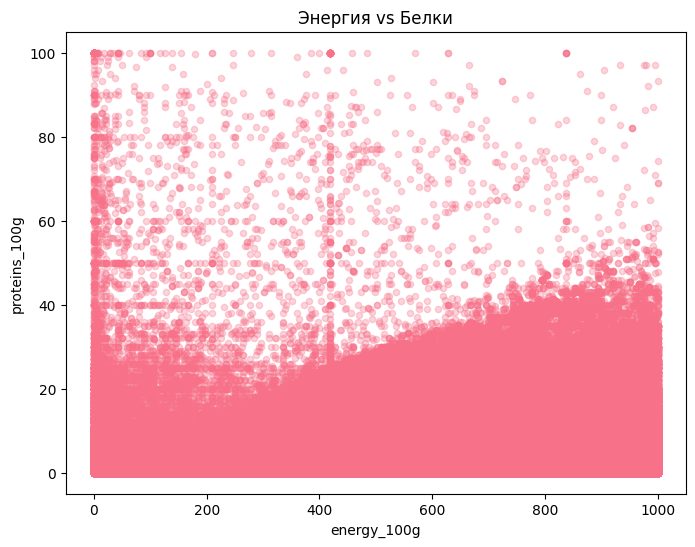

In [5]:

db.plot.scatter(x="energy_100g", y="proteins_100g", alpha=0.3, figsize=(8,6))
plt.title("Энергия vs Белки")
plt.show()


Стандартная диаграмма малоинформативна улучшать ее буду в следующем блоке
 

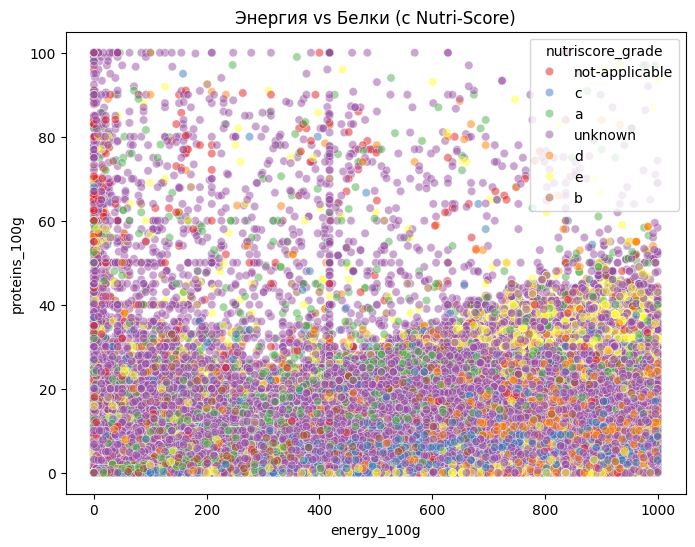

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=db,
    x="energy_100g",
    y="proteins_100g",
    hue="nutriscore_grade",  
    palette="Set1",
    alpha=0.5
)
plt.title("Энергия vs Белки (с Nutri-Score)")
plt.show()


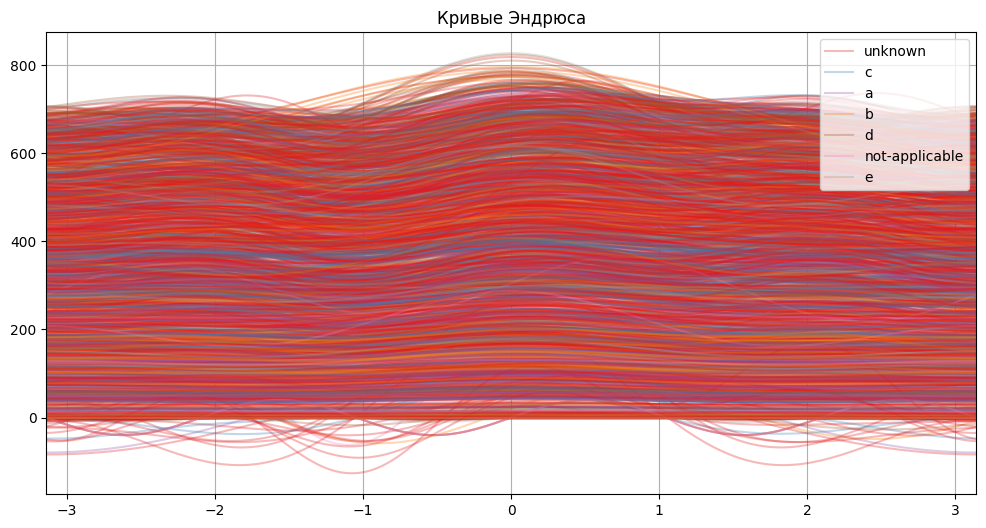

In [7]:
df_plot = db[[
    "energy_100g", "proteins_100g", "carbohydrates_100g",
    "fat_100g", "sugars_100g", "sodium_100g", "nutriscore_grade"
]].dropna()
df_plot = df_plot.sample(2000, random_state=42)  

plt.figure(figsize=(12,6))
andrews_curves(df_plot, "nutriscore_grade", colormap="Set1", alpha=0.3)
plt.title("Кривые Эндрюса")
plt.show()

Было долго генерировать поэтому сделал генерацию только 2000 строк


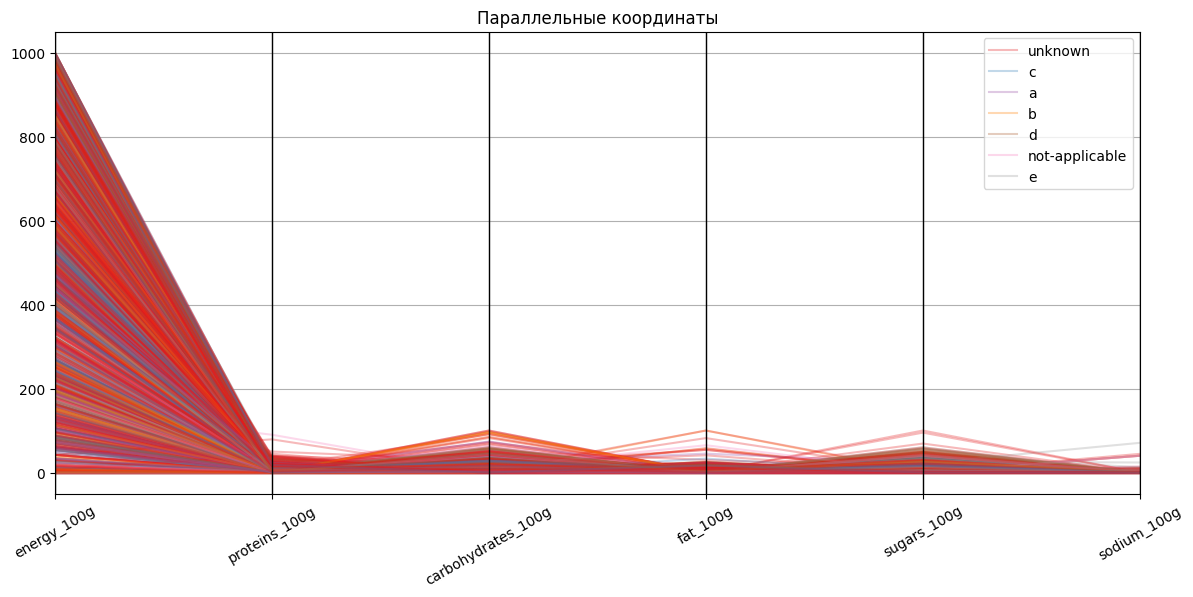

In [8]:
plt.figure(figsize=(14,6))
pc = db[['energy_100g','proteins_100g','carbohydrates_100g',
                  'fat_100g','sugars_100g','sodium_100g','nutriscore_grade']]
pc = pc.sample(2000, random_state=42)
parallel_coordinates(
    pc,
    class_column="nutriscore_grade",
    colormap="Set1",
    alpha=0.3
)
plt.title("Параллельные координаты")
plt.xticks(rotation=30)
plt.show()

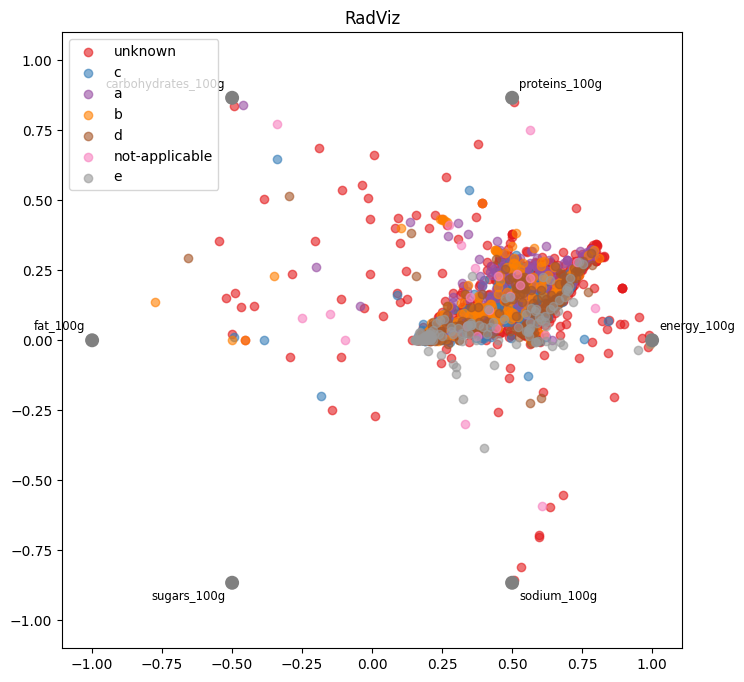

In [9]:
rv = db[['energy_100g','proteins_100g','carbohydrates_100g',
               'fat_100g','sugars_100g','sodium_100g','nutriscore_grade']]

rv = rv.sample(2000, random_state=42)

plt.figure(figsize=(8,8))
radviz(
    rv,
    class_column="nutriscore_grade",
    colormap="Set1",
    alpha=0.6
)
plt.title("RadViz")
plt.show()

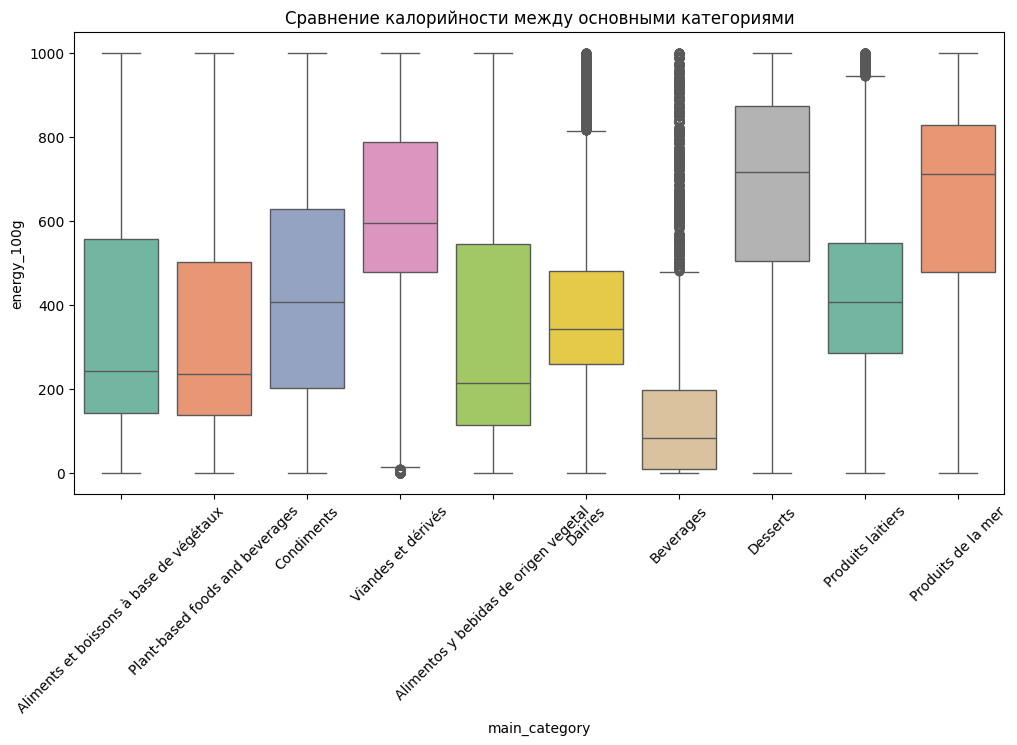

In [12]:
db["main_category"] = db["categories"].dropna().apply(lambda x: x.split(",")[0].strip())

top_categories = db["main_category"].value_counts().nlargest(10).index
df_cat = db[db["main_category"].isin(top_categories)]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_cat,
    x="main_category",
    y="energy_100g",
    palette="Set2"
)
plt.title("Сравнение калорийности между основными категориями")
plt.xticks(rotation=45)
plt.show()


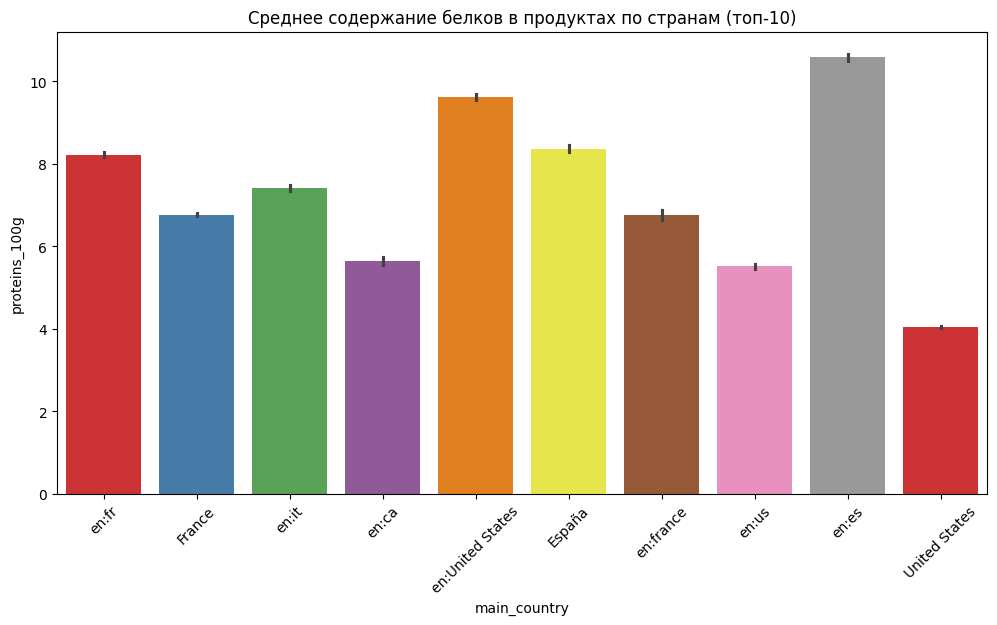

In [13]:
db["main_country"] = db["countries"].dropna().apply(lambda x: x.split(",")[0].strip())

top_countries = db["main_country"].value_counts().nlargest(10).index
db_country = db[db["main_country"].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=db_country,
    x="main_country",
    y="proteins_100g",
    estimator="mean",
    palette="Set1"
)
plt.title("Среднее содержание белков в продуктах по странам (топ-10)")
plt.xticks(rotation=45)
plt.show()

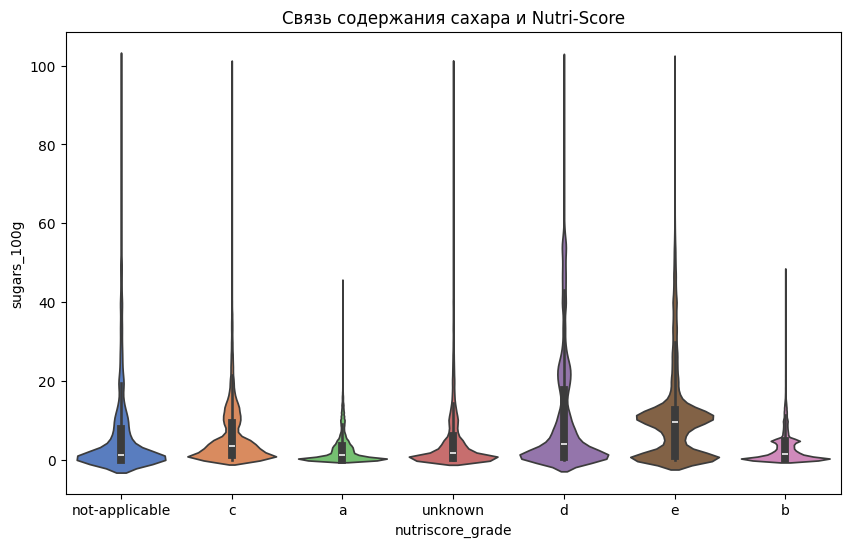

In [14]:
plt.figure(figsize=(10,6))
sns.violinplot(
    data=db,
    x="nutriscore_grade",
    y="sugars_100g",
    palette="muted"
)
plt.title("Связь содержания сахара и Nutri-Score")
plt.show()

Тест пуш для проверки подписи коммитов
